### Dimension Reduction Task02

- 뇌암 유전자 발현 데이터세트를 회귀분석하되, 차원을 축소하여 진행해본다.

In [1]:
import pandas as pd

b_df = pd.read_csv('./datasets/brain_cancer.csv', low_memory=False)
b_df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [2]:
pre_b_df=b_df.drop(labels=['samples'], axis=1)

In [3]:
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [4]:
pre_b_df.type.value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

In [5]:
pre_b_df.isna().sum().sum()

0

In [6]:
pre_b_df.duplicated().sum()

0

In [7]:
pre_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), object(1)
memory usage: 54.2+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_b_df['type'])
pre_b_df['type'] = result
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,0,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,0,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,0,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,0,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,4,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,4,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,4,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [9]:
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,0,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,0,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,0,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,0,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,4,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,4,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,4,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=124)

features, targets = pre_b_df.iloc[:,1:],pre_b_df.iloc[:,0] 

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, stratify=targets, test_size=0.2, random_state=124)

over_X_train, over_y_train = smote.fit_resample(X_train,y_train)

over_y_train.value_counts()

type
2    37
4    37
1    37
0    37
3    37
Name: count, dtype: int64

In [11]:
# train 과 test가 전부 차원 축소가 필요함
# train df, test df

train_df = pd.concat([over_X_train,over_y_train], axis =1).reset_index(drop=True)
test_df = pd.concat([X_test,y_test], axis =1).reset_index(drop=True)

In [12]:
display(train_df)
display(test_df)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,11.401194,8.523019,7.103413,9.930036,5.778261,7.941297,6.692168,7.758998,6.749174,5.070654,...,11.940182,13.646216,13.597221,5.216630,4.678024,3.815507,3.610161,4.557687,4.714354,2
1,13.065363,8.555783,7.438600,9.777299,4.797744,8.274576,6.862205,7.521131,6.292229,5.323437,...,11.154223,13.433052,13.138487,5.313133,5.145531,3.712049,3.543481,4.481099,4.438593,4
2,12.381536,9.282545,9.671043,8.224457,6.017184,8.597751,6.273210,5.767105,7.069769,4.946979,...,11.703560,13.924516,13.473175,4.883626,4.461374,3.818766,3.669596,4.598878,4.470067,1
3,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450,0
4,12.422155,8.175979,7.239501,9.391487,4.192817,6.895597,6.245130,5.917008,5.806313,5.117815,...,12.550633,13.297571,13.464840,5.232236,4.689635,3.975557,3.554292,4.472155,4.547272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,12.965907,8.689035,7.668416,8.912746,7.018469,8.849549,7.155374,6.034784,5.717170,5.224967,...,11.872637,13.994592,13.723533,4.861759,4.755567,3.722048,3.698885,4.628046,4.739883,4
181,12.847102,8.571379,8.534243,9.001585,4.382915,7.930277,7.055840,6.417758,6.020820,5.132598,...,12.289967,13.953097,13.779323,5.200052,4.909781,3.819508,3.760883,4.648503,4.726563,4
182,12.966561,8.783364,7.853092,8.643272,5.831549,8.666251,6.928094,6.114382,5.545675,5.305806,...,11.894956,13.866281,13.662258,5.236473,4.899891,4.010162,4.095304,4.718715,4.605328,4
183,13.152739,8.693619,7.180216,9.680599,5.981930,8.377937,6.768767,6.992300,6.170241,5.327574,...,11.083028,13.371221,13.155793,5.291071,4.981565,3.850370,3.633096,4.468592,4.453969,4


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,10.809104,9.734296,7.358061,8.493830,4.442022,7.776318,6.312595,6.151626,5.843826,4.797213,...,12.994075,14.314795,14.108806,5.330537,4.651373,3.860167,3.731357,4.893880,5.008837,2
1,12.956728,8.603778,8.311467,8.205823,4.256073,7.692394,8.013890,6.401934,6.197651,5.878660,...,11.982074,13.805908,13.738999,5.539376,5.142479,4.115938,3.934061,4.843886,4.723886,1
2,13.126227,8.776884,8.904740,9.725093,4.450045,7.619463,6.190649,7.356496,7.066675,5.648796,...,11.003332,13.373192,13.215212,5.317403,5.025101,4.043758,3.544146,4.609534,4.560564,0
3,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827,0
4,12.645764,8.406188,7.321294,8.133787,4.253772,8.648658,6.408554,6.044084,5.836209,5.699005,...,12.485848,13.984499,13.844651,5.157775,5.110835,4.031479,4.036595,4.703046,4.632502,0
5,12.180322,8.993027,8.008274,9.493953,4.454340,9.052279,6.331221,6.812413,7.634342,5.272973,...,11.357289,13.492403,13.329294,5.252382,4.974248,4.039301,3.655452,4.483640,4.882925,1
6,12.686229,9.432470,7.565431,8.513028,4.460844,7.726511,7.024936,5.948060,4.969492,5.285216,...,11.882388,13.822238,13.690849,5.252660,4.687568,3.739829,3.719055,4.789128,4.576341,1
7,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,...,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952,4
8,13.234953,8.791183,7.396934,9.620107,4.042272,8.187909,6.209151,7.854998,5.868348,5.467822,...,11.199477,13.497467,13.277007,5.257497,4.916579,3.775782,3.521153,4.509411,4.406531,0
9,12.907679,8.877593,8.559765,9.340506,4.187450,9.087537,6.966462,7.085665,8.385011,5.121936,...,11.873569,13.658826,13.481982,5.191887,4.864895,3.863391,3.933492,4.651097,4.585656,0


In [13]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=축소할 차원)
pca = PCA(n_components=2)

# train
pca_train = pca.fit_transform(train_df.iloc[:,:-1])

# test
pca_test = pca.fit_transform(test_df.iloc[:,:-1])

# 결과 출력
print(pca_train.shape, pca_test.shape)

(185, 2) (26, 2)


In [14]:
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['type']

In [15]:
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['type']

In [16]:
# 보존률 확인

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.18682737 0.15666425]
0.3434916201516724


<Axes: xlabel='pca1', ylabel='pca2'>

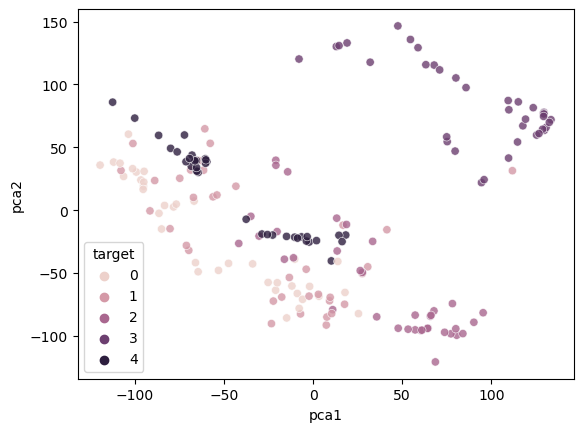

In [17]:
# 시각화

import seaborn as sns

sns.scatterplot(x = "pca1", y = "pca2", hue ="target" ,data = pca_train_df, alpha=0.8)

In [67]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=축소할 차원)
pca = PCA(n_components=8)

# train
pca_train = pca.fit_transform(train_df.iloc[:,:-1])

# test
pca_test = pca.fit_transform(test_df.iloc[:,:-1])

# 결과 출력
print(pca_train.shape, pca_test.shape)

(185, 8) (26, 8)


In [68]:
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['type']

In [69]:
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['type']

In [70]:
# 보존률 확인

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.18682737 0.15666425 0.12155845 0.08495982 0.05244726 0.04598664
 0.04075785 0.03521073]
0.7244123707493594


<Axes: xlabel='pca1', ylabel='pca2'>

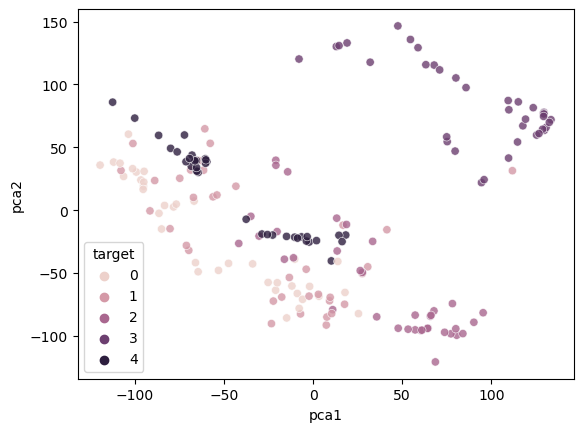

In [71]:
# 시각화

import seaborn as sns

sns.scatterplot(x = "pca1", y = "pca2", hue ="target" ,data = pca_train_df, alpha=0.8)

In [72]:
from statsmodels.api import OLS

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.253
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              7.505
Date:                Tue, 07 May 2024   Prob (F-statistic):                    1.32e-08
Time:                        15:22:47   Log-Likelihood:                         -401.23
No. Observations:                 185   AIC:                                      818.5
Df Residuals:                     177   BIC:                                      844.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,0,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,0,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,0,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,0,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,4,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,4,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,4,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rfc = RandomForestClassifier()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('rfc', rfc)])
pipe.fit(X_train, y_train)


parameters = {'rfc__max_depth': [5, 10, 20], 'rfc__min_samples_split': [10, 50, 100]}

g_pipe = GridSearchCV(pipe,param_grid=parameters, cv= 5,return_train_score=True, scoring='accuracy')
g_pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [5, 10, 20],
                         'rfc__min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [75]:
result_df = pd.DataFrame(g_pipe.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.692857,1
1,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.557619,4
2,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.346190,7
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.654762,3
4,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.519524,6
5,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.346190,7
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.672857,2
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.548095,5
8,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.346190,7


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [77]:
prediction = g_pipe.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[7 3 0 0 0]
 [3 1 0 0 0]
 [0 1 4 1 0]
 [1 0 0 1 0]
 [2 2 0 0 0]]
정확도: 0.5000, 정밀도: 0.4363, 재현율: 0.4233, F1: 0.4181
################################################################################


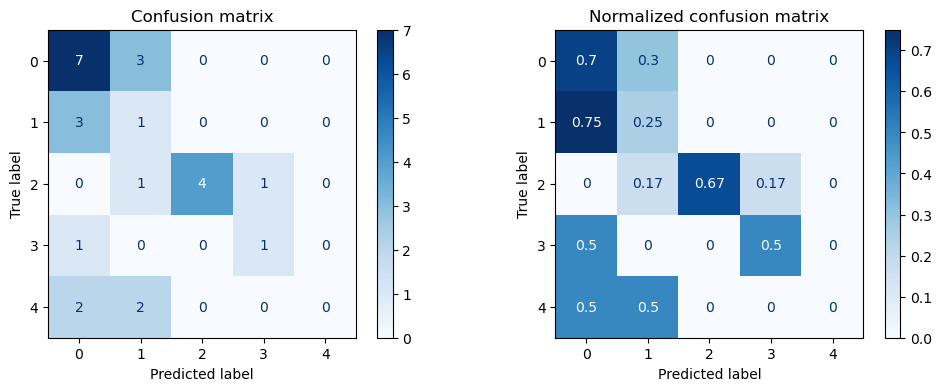

In [78]:
get_evaluation(y_test, prediction, g_pipe, X_test)

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=124)

features, targets = pre_b_df.iloc[:,1:],pre_b_df.iloc[:,0] 


X_train, X_test, y_train, y_test = \
train_test_split(features,targets, stratify=targets, test_size=0.2, random_state=124)

over_X_train, over_y_train = smote.fit_resample(X_train,y_train)

over_y_train.value_counts()

type
2    37
4    37
1    37
0    37
3    37
Name: count, dtype: int64

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# pca = PCA(n_components=축소할 차원)
lda = LinearDiscriminantAnalysis(n_components=4)

# train
lda_train = lda.fit_transform(train_df.iloc[:,:-1], train_df.iloc[:,-1])

# test
lda_test = lda.fit_transform(test_df.iloc[:,:-1], test_df.iloc[:,-1])

# 결과 출력
print(lda_train.shape, lda_test.shape)

(185, 4) (26, 4)


In [89]:
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]

# 데이터 프레임 생성
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = train_df['type']

In [90]:
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_test.shape[1])]

# 데이터 프레임 생성
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
lda_test_df.loc[:, 'target'] =  test_df['type']

In [91]:
lda_test_df

,lda1,lda2,lda3,lda4,target
0,-0.130990,-0.798159,0.982758,-0.025980,2
1,-0.942928,0.831751,0.126548,-0.645082,1
2,0.711590,-0.128695,0.154858,-1.225071,0
3,0.039883,-1.214329,0.616156,-0.571350,0
4,0.671258,0.765559,-2.345735,-1.331783,0
5,1.047829,0.433720,0.331288,0.876178,1
6,-0.225348,-0.937466,1.448570,0.577689,1
7,-0.368911,0.928530,1.123363,1.141482,4
8,3.345018,-0.715844,-2.226565,0.172270,0
9,1.042167,1.228536,1.145795,0.358062,0


In [92]:
# 보존률 확인

print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.44945128 0.31727863 0.15846441 0.07480568]
0.9999999999999998


<Axes: xlabel='lda1', ylabel='lda2'>

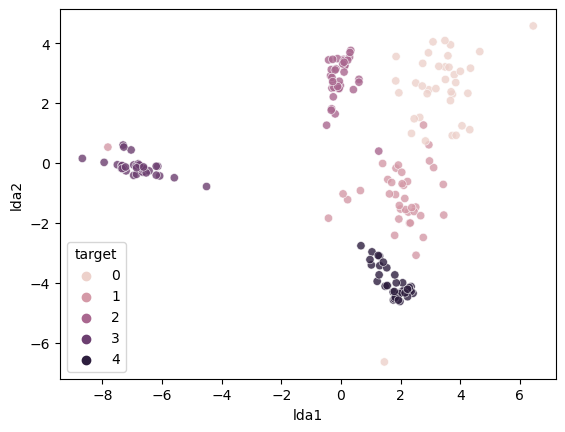

In [93]:
# 시각화

import seaborn as sns

sns.scatterplot(x = "lda1", y = "lda2", hue ="target" ,data = lda_train_df, alpha=0.8)

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rfc = RandomForestClassifier()

pipe = Pipeline([('std', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=2)), ('rfc', rfc)])
pipe.fit(X_train, y_train)


parameters = {'rfc__max_depth': [5, 10, 20], 'rfc__min_samples_split': [10, 50, 100]}

g_pipe = GridSearchCV(pipe,param_grid=parameters, cv= 5,return_train_score=True, scoring='accuracy')
g_pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('lda',
                                        LinearDiscriminantAnalysis(n_components=2)),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [5, 10, 20],
                         'rfc__min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [95]:
result_df = pd.DataFrame(g_pipe.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.816667,3
1,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.606190,4
2,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.346190,7
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.826190,2
4,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.606190,4
5,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.346190,7
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.846190,1
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.587143,6
8,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.346190,7


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [97]:
prediction = g_pipe.predict(X_test)

오차 행렬
[[10  0  0  0  0]
 [ 0  1  2  0  1]
 [ 0  1  5  0  0]
 [ 0  0  0  2  0]
 [ 0  4  0  0  0]]
정확도: 0.6923, 정밀도: 0.5762, 재현율: 0.6167, F1: 0.5938
################################################################################


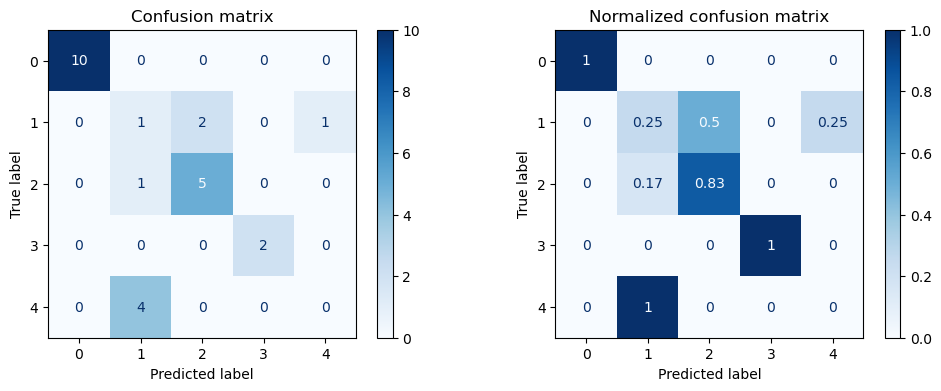

In [98]:
get_evaluation(y_test, prediction, g_pipe, X_test)